In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import seaborn as sns

from sklearn import tree
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import graphviz

In [3]:
df = pd.read_csv('training_data_VT2026.csv')

df['increase_stock'] = df['increase_stock'].map({'high_bike_demand': True, 'low_bike_demand': False}) 
#High demand = True, Low demand = False

In [7]:

train, test = train_test_split(df, test_size=0.2, random_state=1)
X_train = train.drop(columns = ['increase_stock'])
y_train = train['increase_stock']
X_test = test.drop(columns = ['increase_stock'])
y_test = test['increase_stock']

model = tree.DecisionTreeClassifier(max_depth = 10)
model.fit(X = X_train, y = y_train)

DecisionTreeClassifier(max_depth=10)

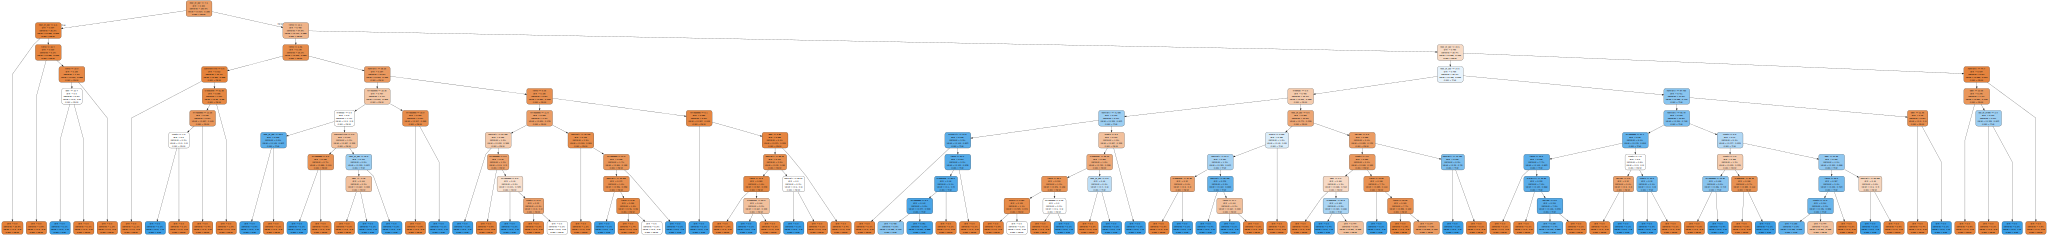

In [8]:
dot_data = tree.export_graphviz(model, out_file = None, feature_names = X_train.columns, 
                                class_names = [str(c) for c in model.classes_], filled = True, rounded = True,
                                leaves_parallel = True, proportion = True)

graph = graphviz.Source(dot_data)
graph

In [9]:

y_predict = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_predict))
pd.crosstab(y_predict, y_test)



Accuracy: 0.871875


increase_stock,False,True
row_0,,
False,242,13
True,28,37
